<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Mushroom dataset using Support Vector Machines (SVM). The analysis should include exploratory data analysis (EDA), data preprocessing, data visualization, SVM implementation, model evaluation, visualization of results, hyperparameter tuning, comparison of different kernels, and a discussion of the findings and practical implications.

## Load and explore the dataset

### Subtask:
Load the Mushroom dataset and perform basic exploratory data analysis (EDA) to understand the data.


**Reasoning**:
Load the dataset into a pandas DataFrame and perform initial EDA steps as requested in the instructions.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/mushroom.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print the concise summary
print("\nConcise summary of the DataFrame:")
df.info()

# Display descriptive statistics
print("\nDescriptive statistics of the DataFrame:")
display(df.describe())

# Print the number of unique values for each column
print("\nNumber of unique values for each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

First 5 rows of the DataFrame:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245



Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  20

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054



Number of unique values for each column:
Unnamed: 0: 976
cap_shape: 5
cap_surface: 4
cap_color: 9
bruises: 2
odor: 9
gill_attachment: 4
gill_spacing: 3
gill_size: 2
gill_color: 12
stalk_shape: 2
stalk_root: 7
stalk_surface_above_ring: 4
stalk_surface_below_ring: 4
stalk_color_above_ring: 9
stalk_color_below_ring: 9
veil_type: 2
veil_color: 4
ring_number: 3
ring_type: 8
spore_print_color: 9
population: 6
habitat: 7
class: 2
stalk_height: 973
cap_diameter: 976


## Visualize feature distributions

### Subtask:
Create visualizations such as histograms, box plots, or density plots to understand the distribution of each feature.


**Reasoning**:
Identify numerical and categorical columns and create visualizations to understand their distributions.



Visualizing numerical column distributions:


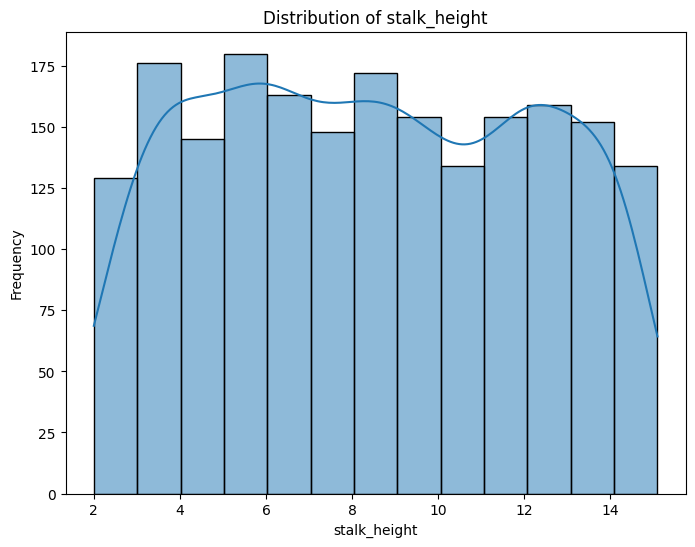

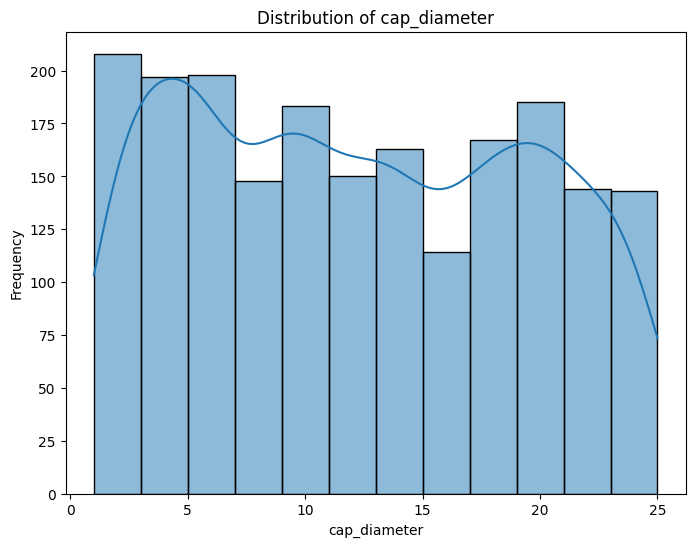

Visualizing categorical column distributions:


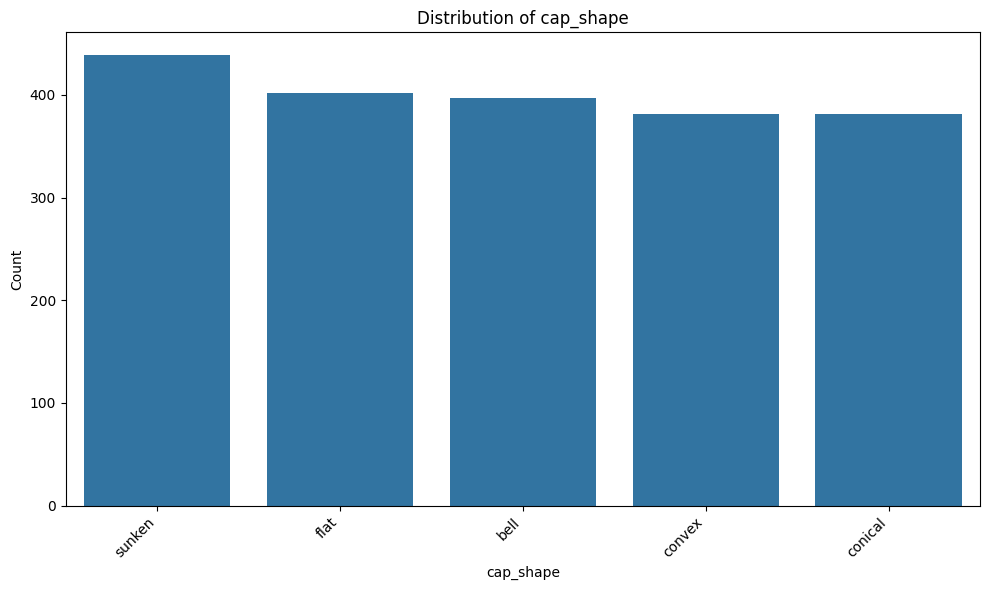

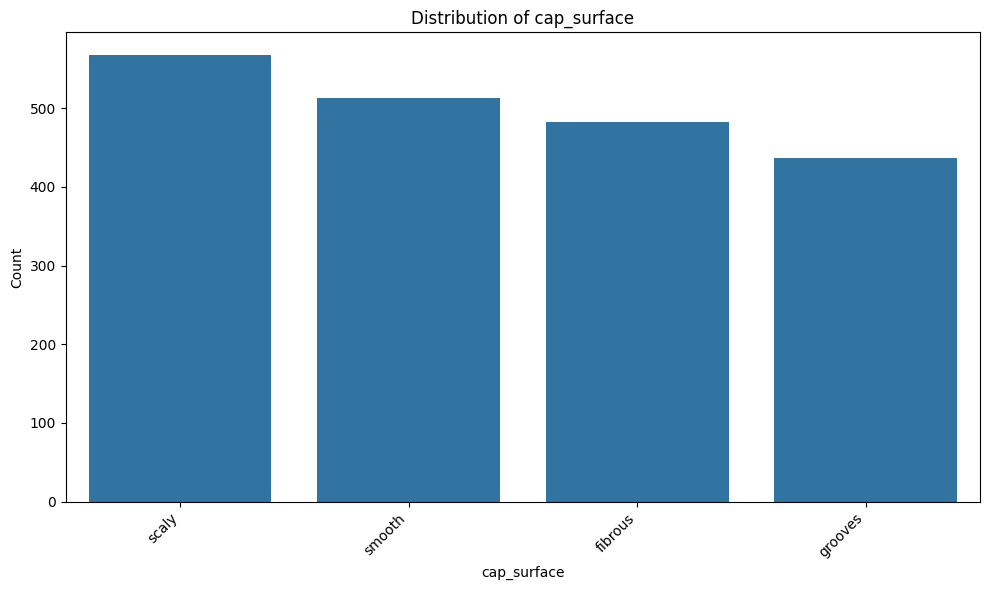

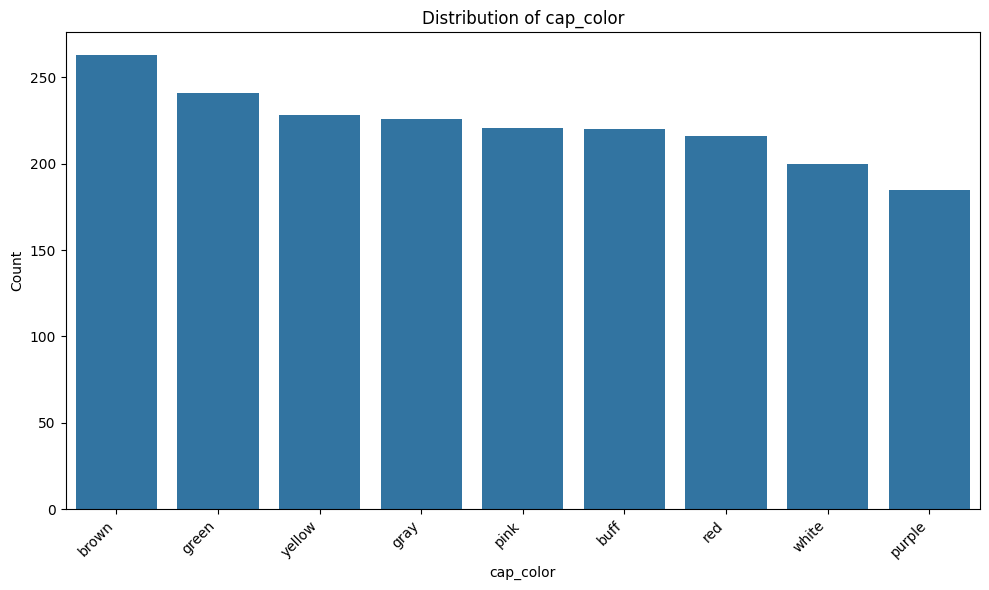

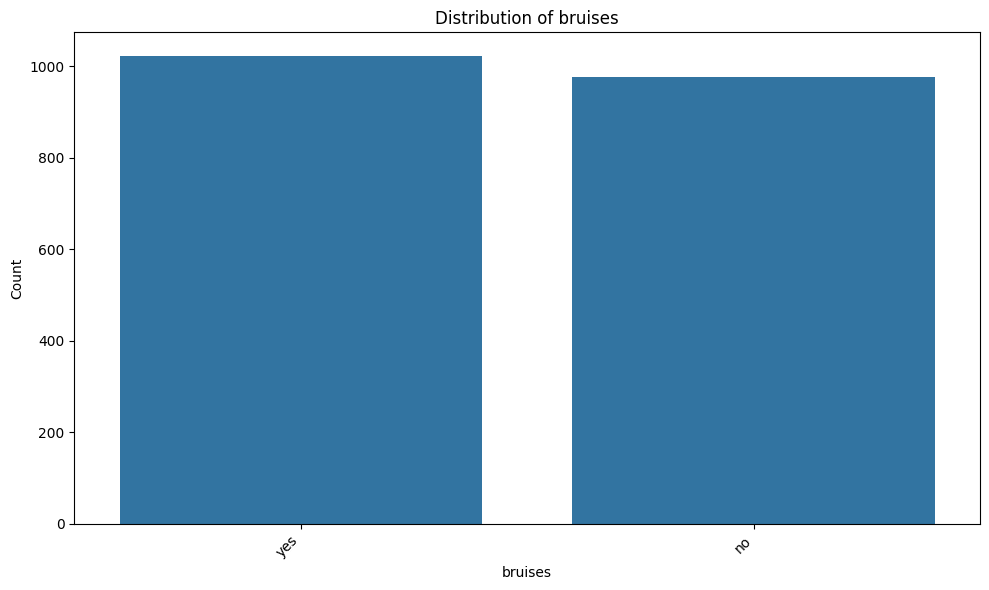

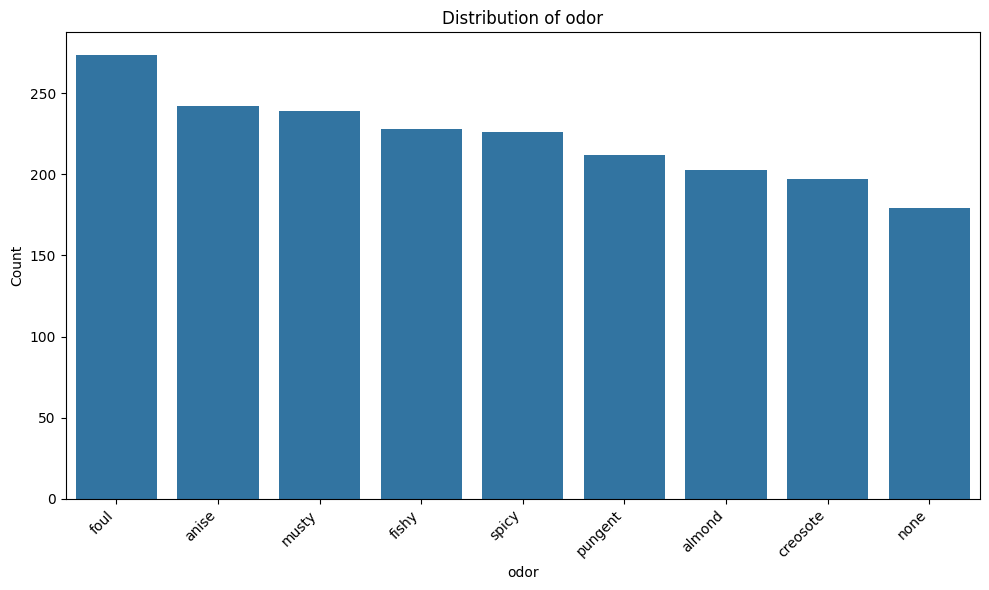

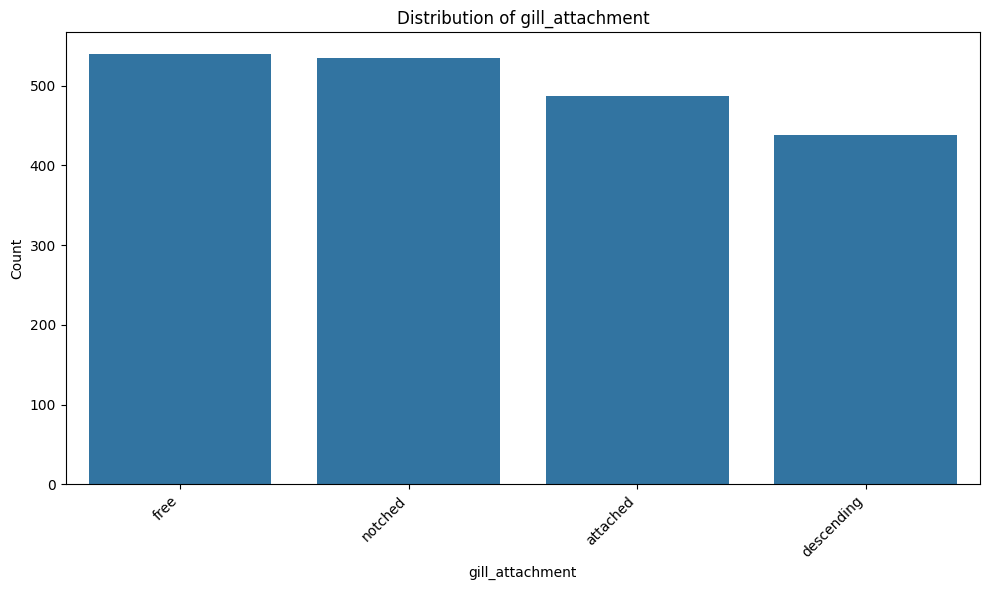

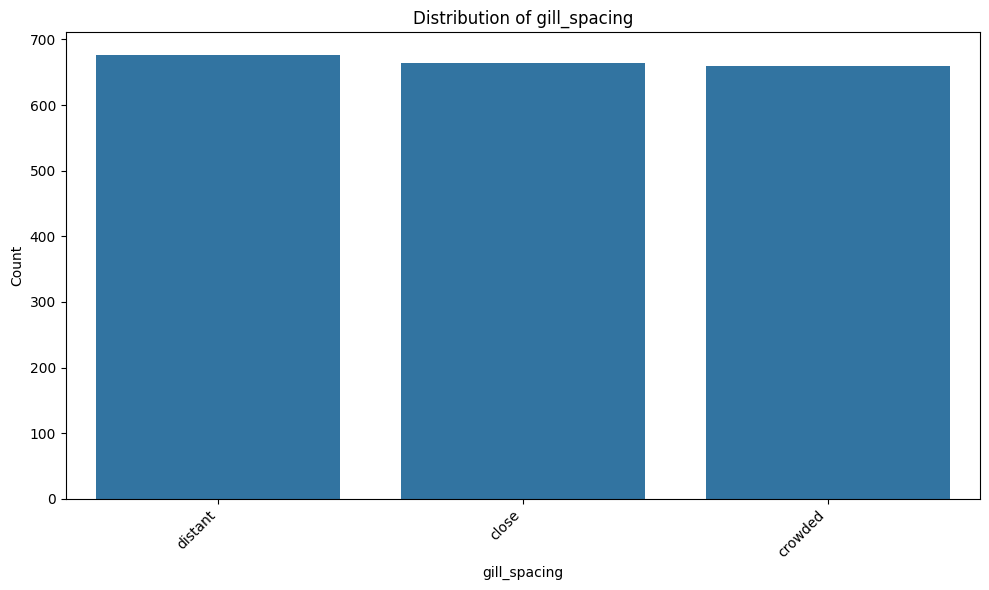

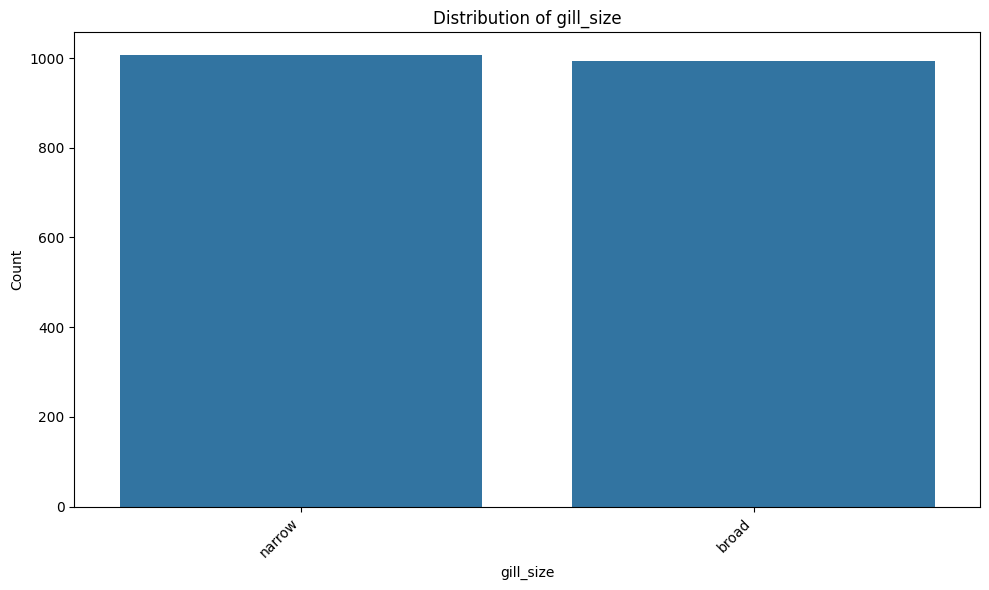

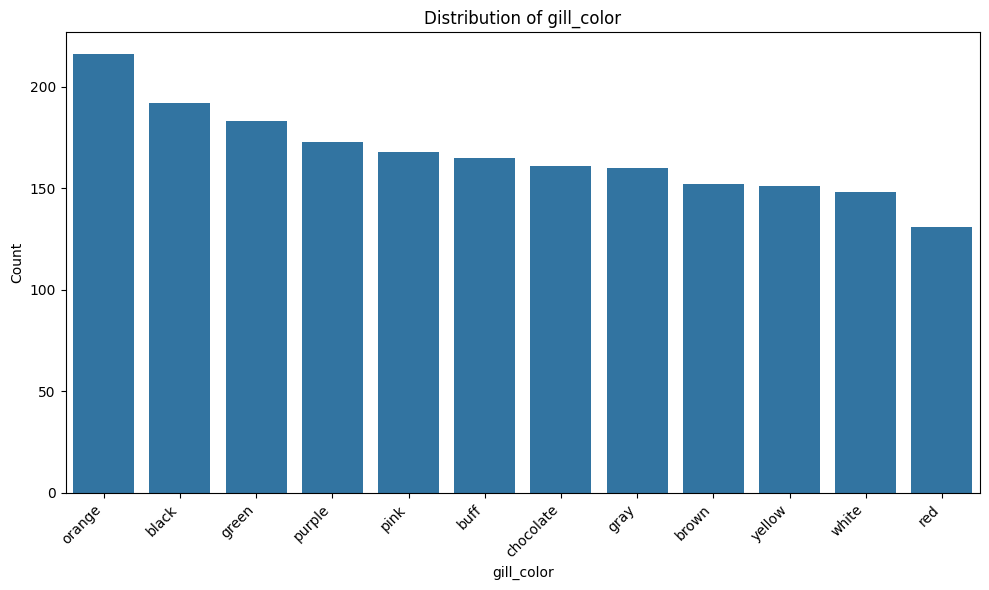

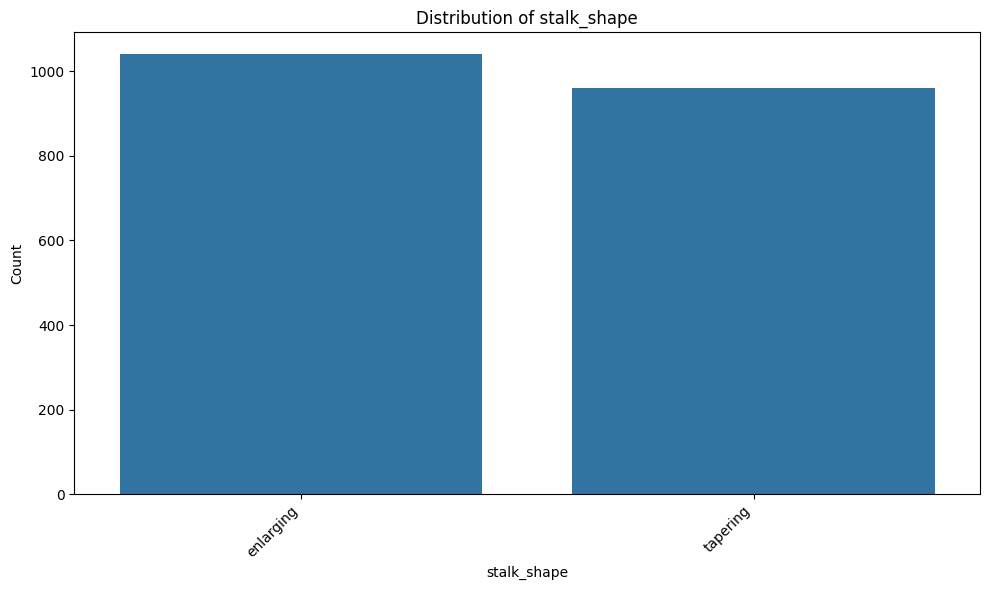

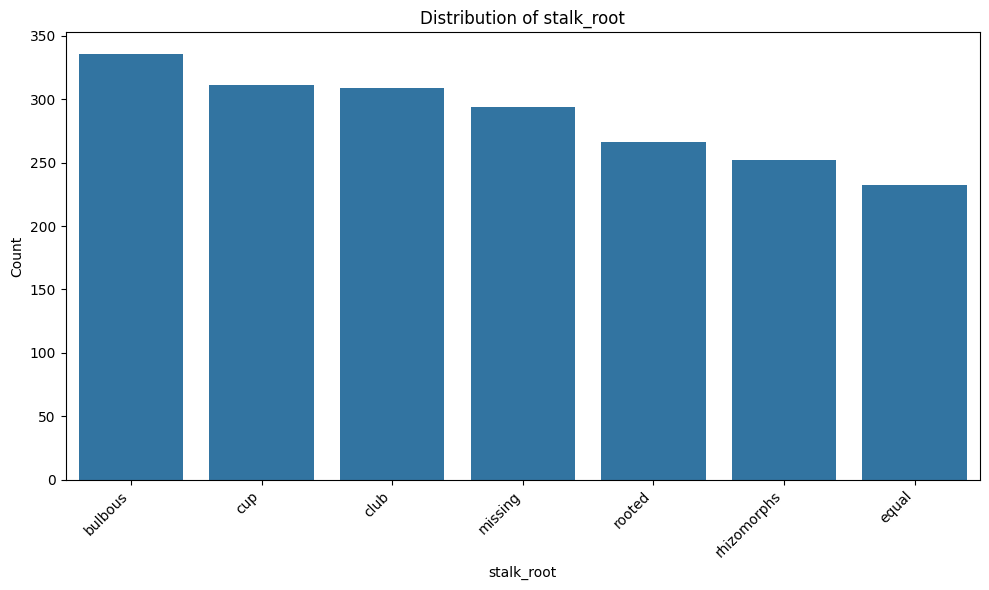

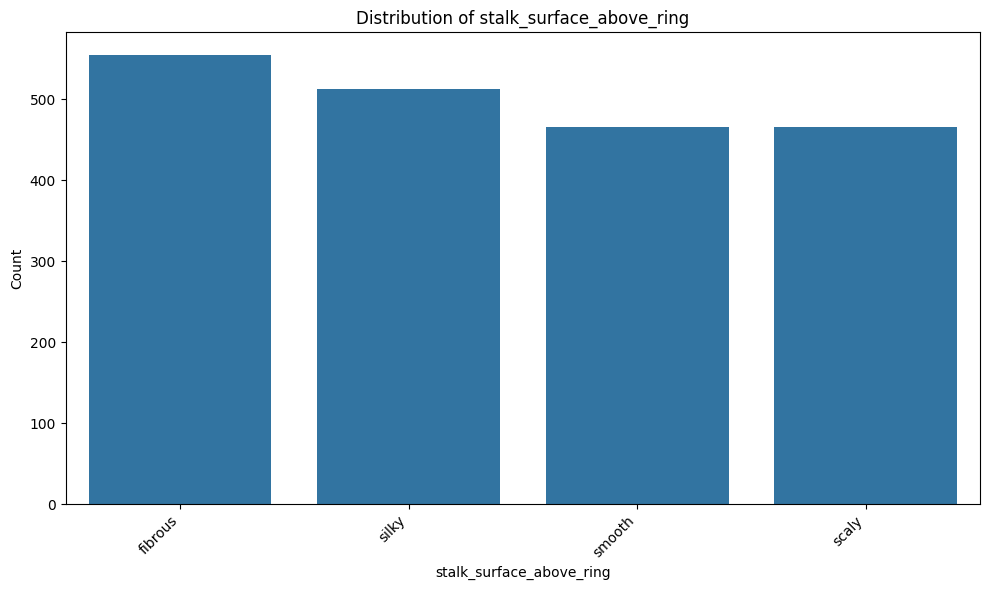

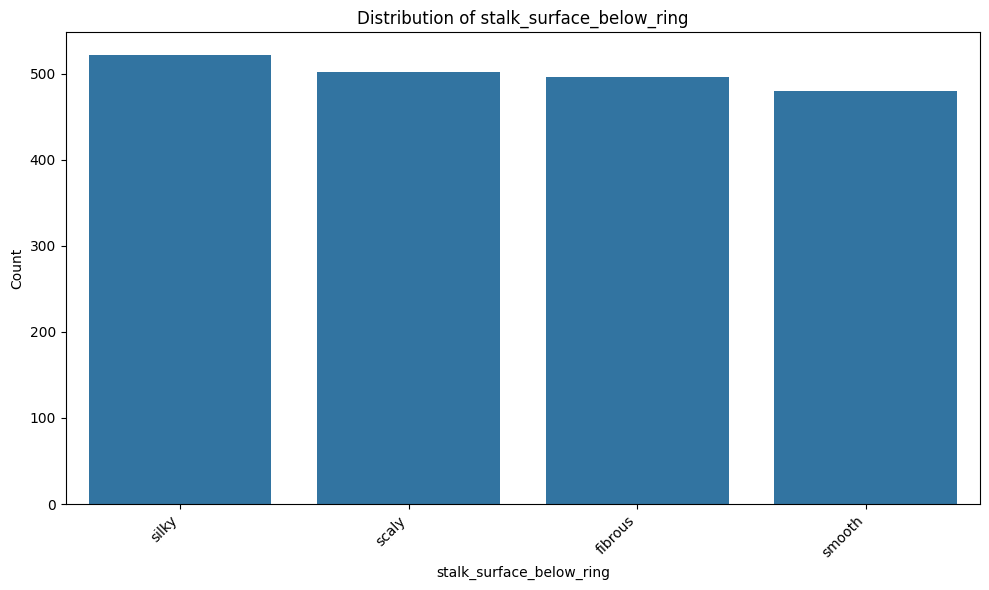

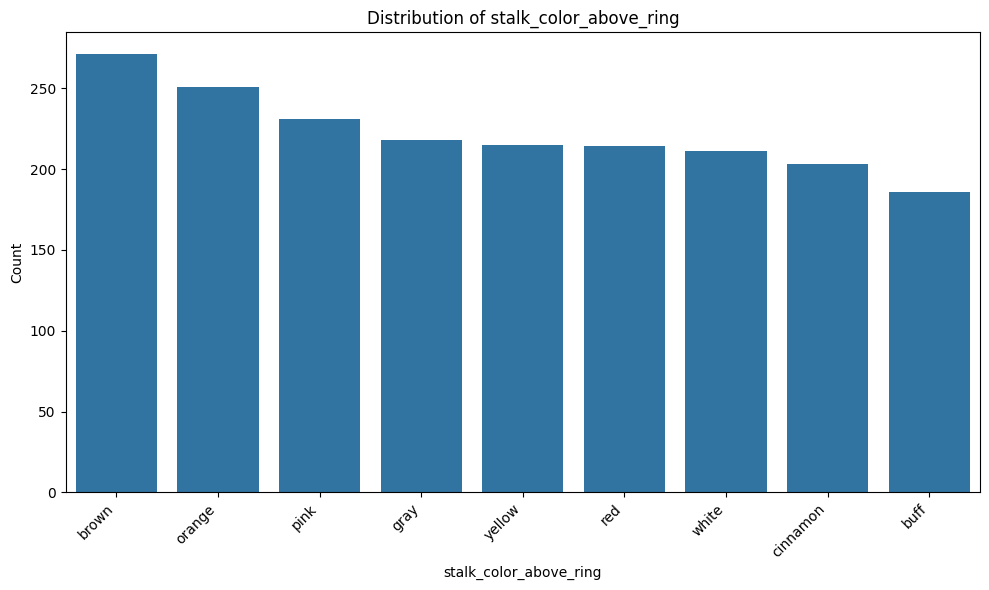

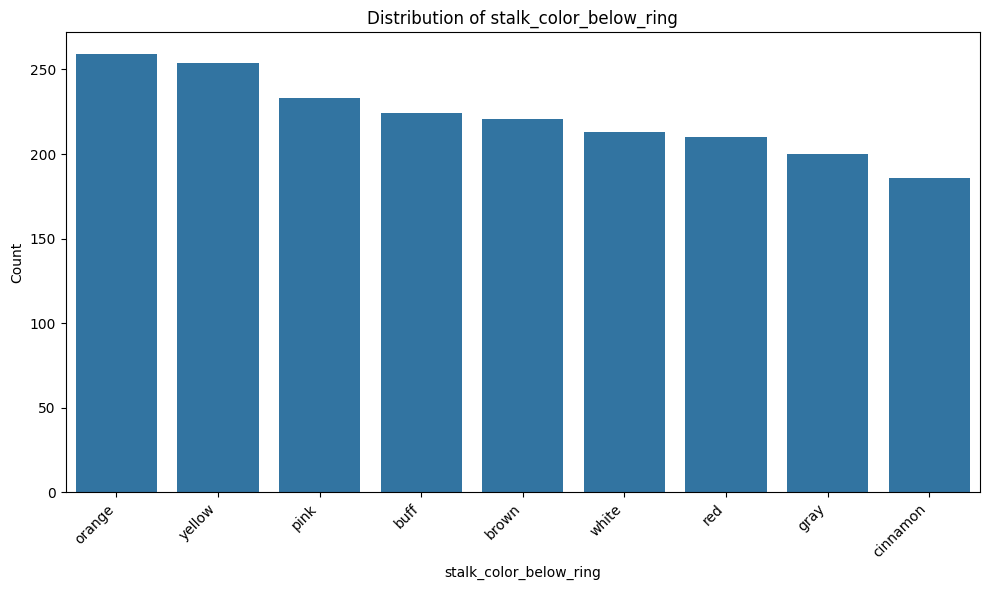

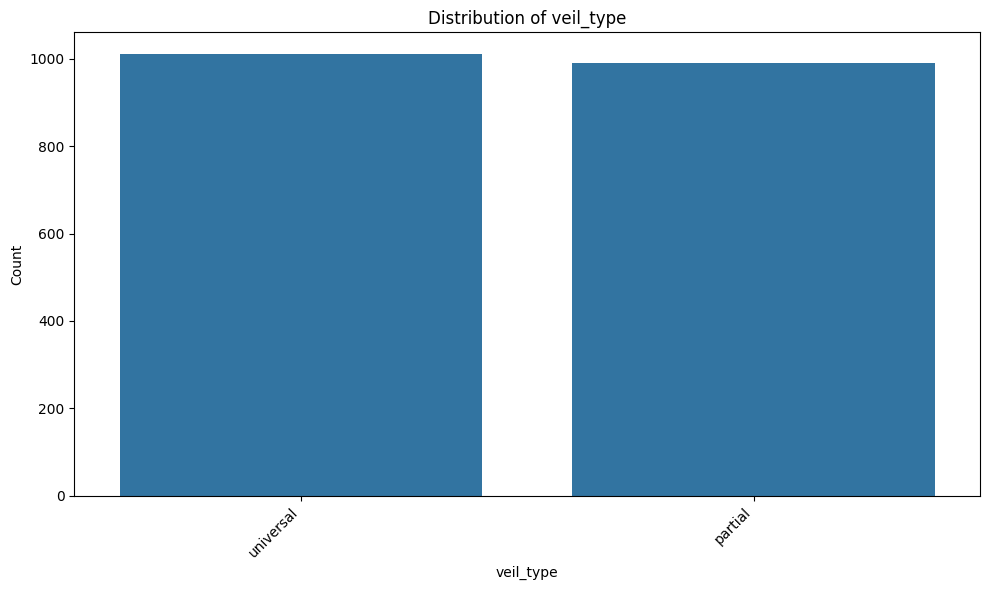

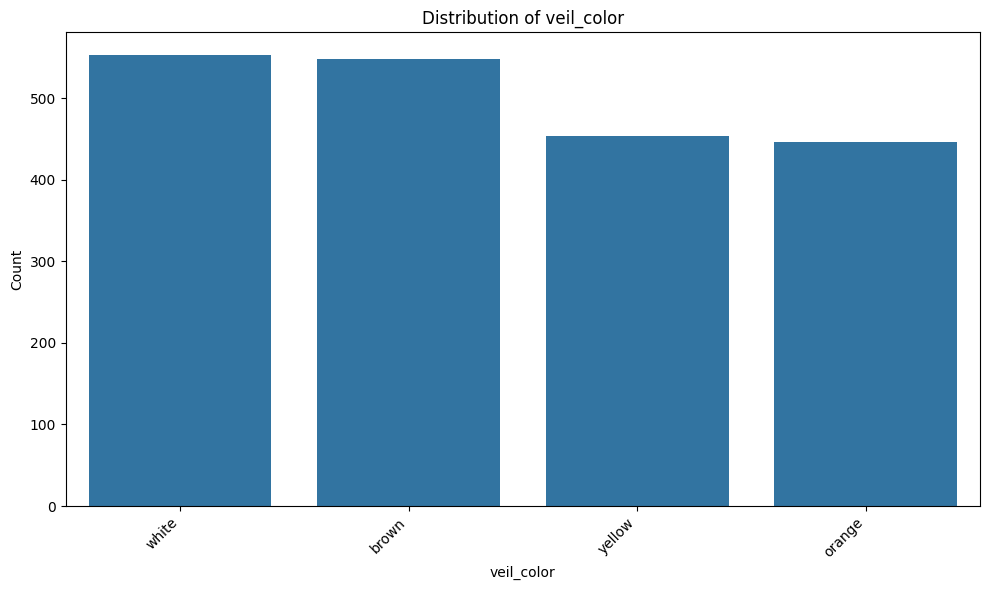

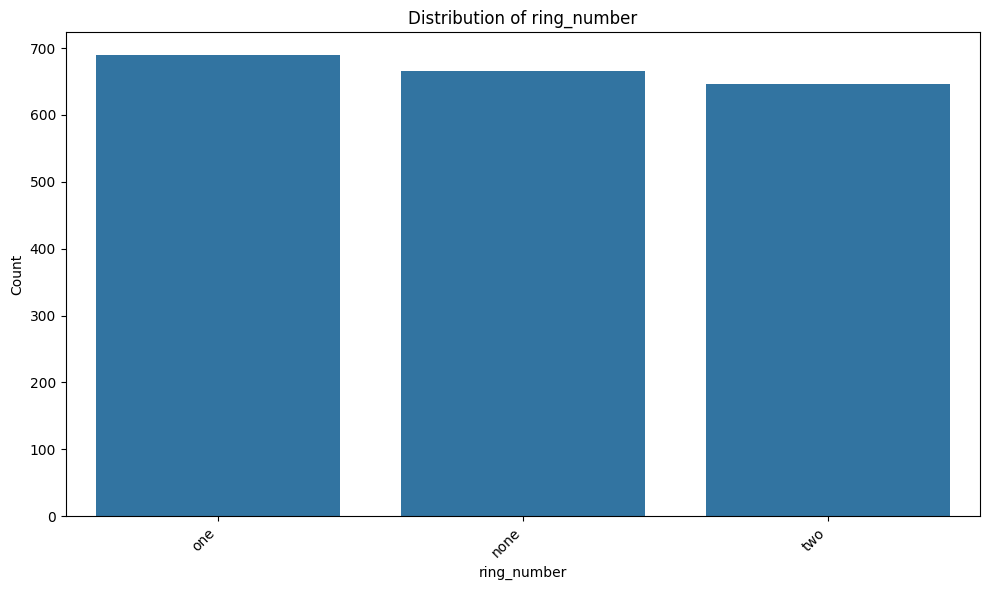

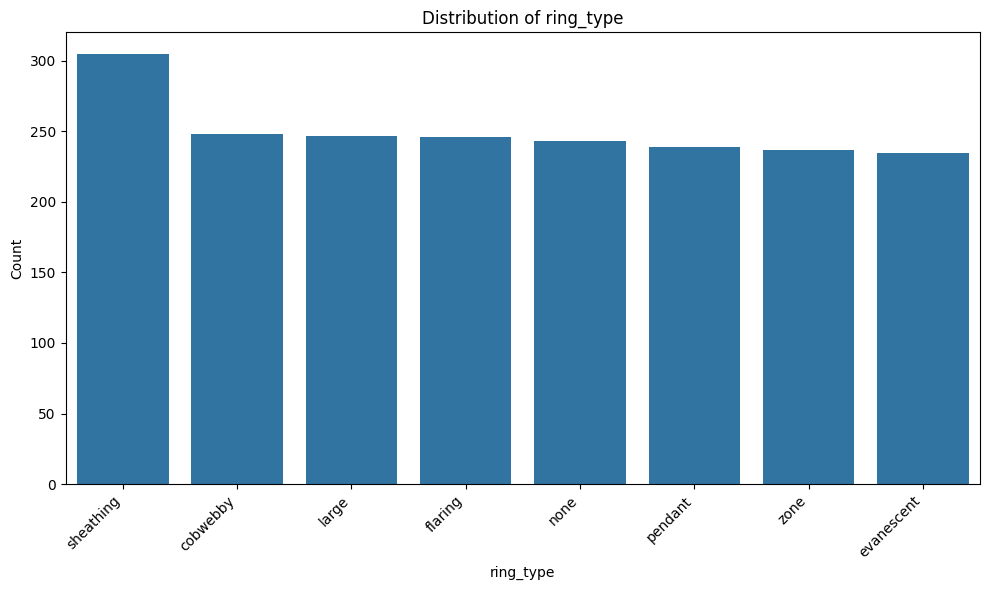

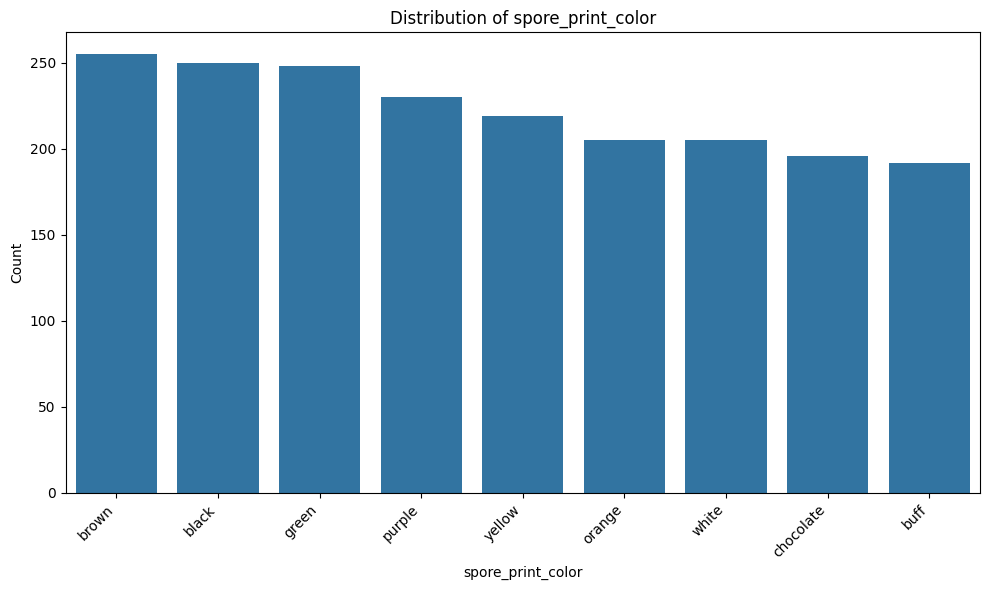

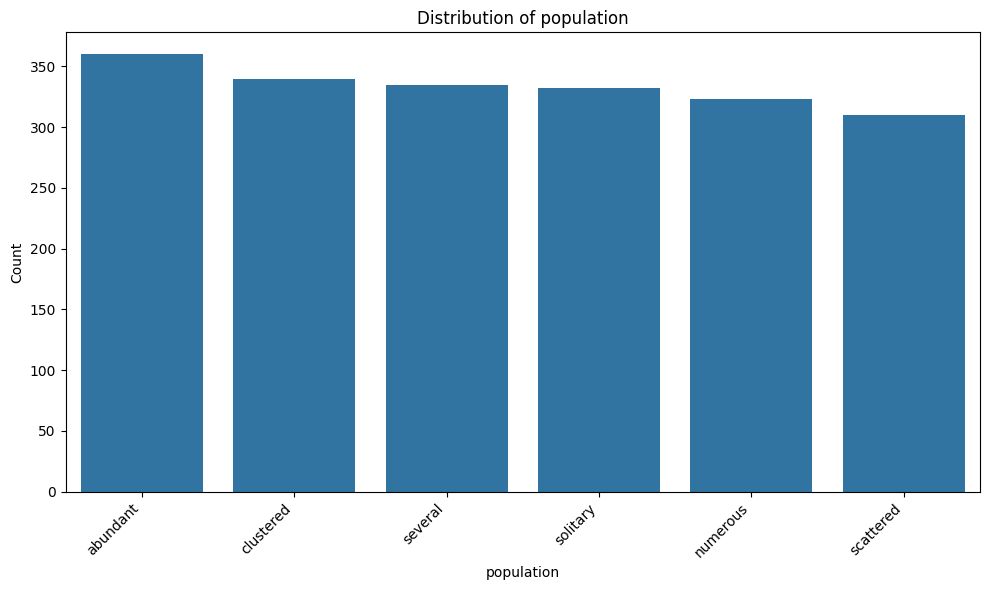

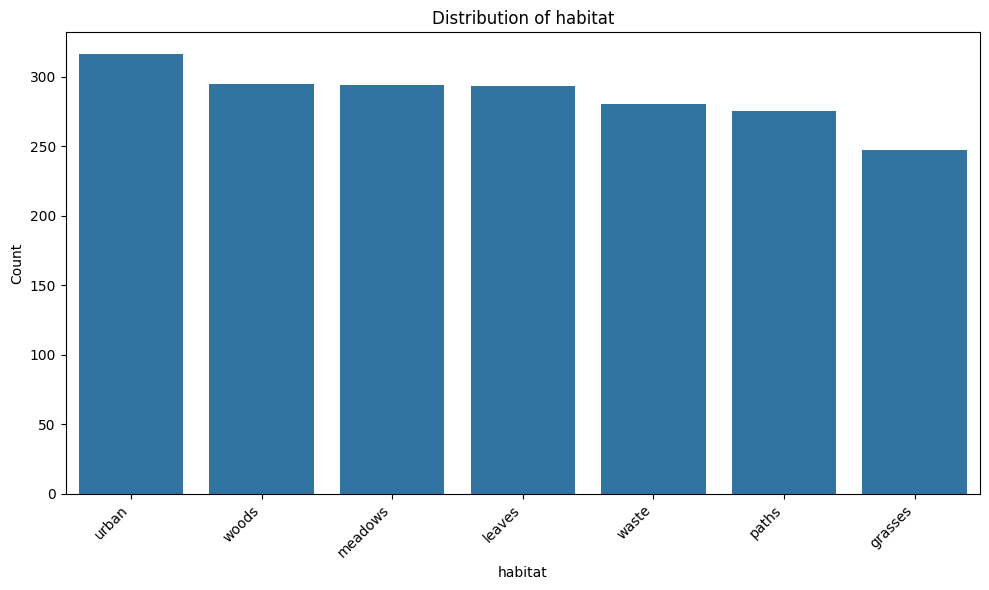

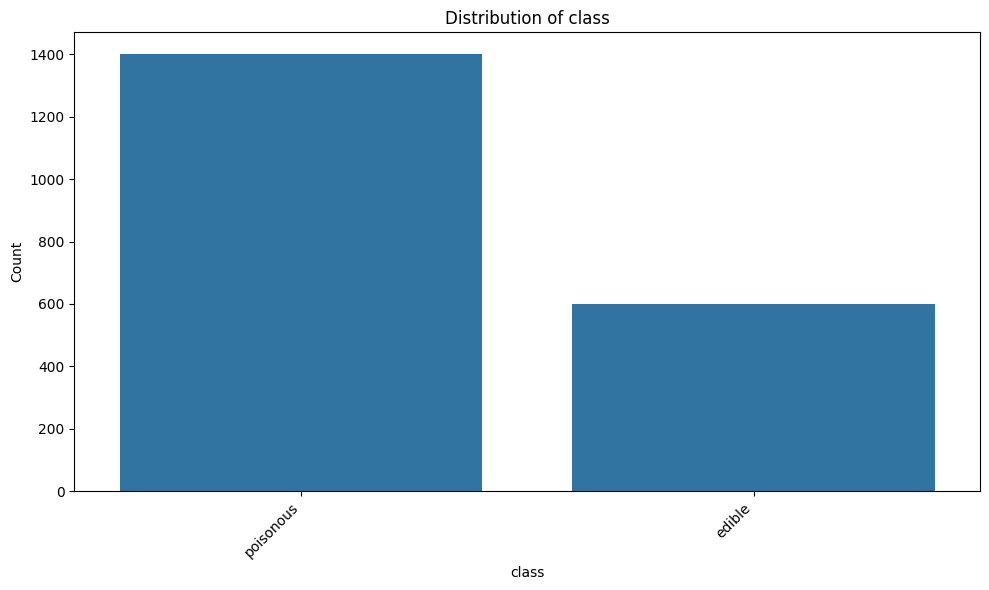

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude 'Unnamed: 0' as it seems to be an index
numerical_cols.remove('Unnamed: 0')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Visualize numerical columns
print("Visualizing numerical column distributions:")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize categorical columns
print("Visualizing categorical column distributions:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Investigate feature correlations

### Subtask:
Analyze the correlations between features to identify any relationships.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and display it.



In [3]:
# Select numerical columns, excluding 'Unnamed: 0'
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix for Numerical Features:")
display(correlation_matrix)

Correlation Matrix for Numerical Features:


,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


## Preprocess the data

### Subtask:
Encode categorical variables if necessary and split the dataset into training and testing sets.


**Reasoning**:
Identify and encode categorical variables using one-hot encoding, then split the data into training and testing sets, stratifying by the target variable 'class'.



In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Identify categorical columns (excluding the target 'class')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'class' in categorical_cols:
    categorical_cols.remove('class')

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['class', 'Unnamed: 0']) # Drop 'Unnamed: 0' as it's not a feature
y = df_encoded['class']

# Split data into training and testing sets (80/20 split, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 104)
Shape of X_test: (400, 104)
Shape of y_train: (1600,)
Shape of y_test: (400,)


## Visualize data distributions and relationships

### Subtask:
Create scatter plots, pair plots, or other relevant visualizations to understand feature distributions and relationships and visualize class distributions.


**Reasoning**:
Create a scatter plot of 'stalk_height' vs. 'cap_diameter' colored by 'class' and a countplot of 'class' distribution.



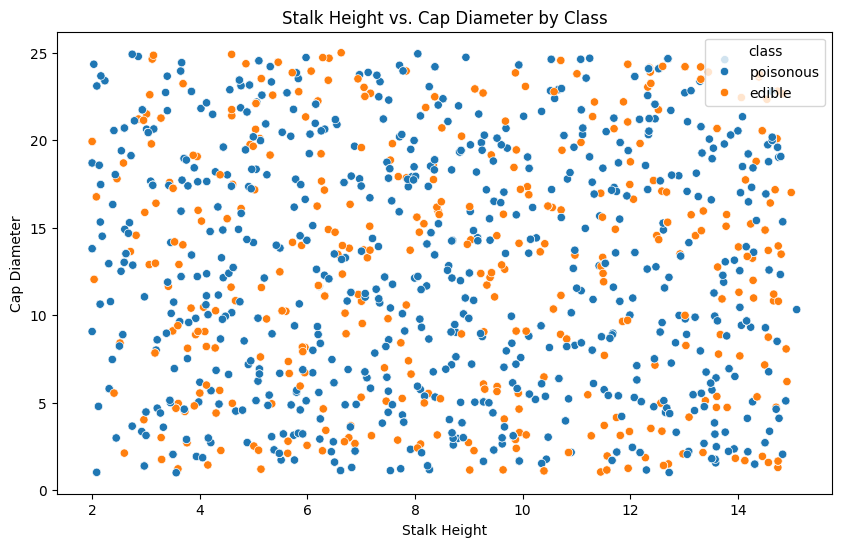

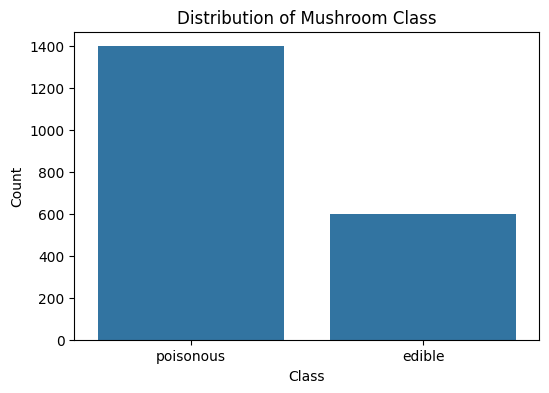

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'stalk_height' vs. 'cap_diameter' colored by 'class'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class')
plt.title('Stalk Height vs. Cap Diameter by Class')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

# Create a countplot of the 'class' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Distribution of Mushroom Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Implement and train svm

### Subtask:
Implement a basic SVM classifier using scikit-learn and train it on the training data.


**Reasoning**:
Implement a basic SVM classifier with a linear kernel and train it on the training data.



In [6]:
from sklearn.svm import SVC

# Instantiate an SVC object with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


## Evaluate svm performance

### Subtask:
Evaluate the trained SVM model on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the trained SVM model using predictions on the test set and calculate the accuracy and classification report.



In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy of the SVM model: 0.7000

Classification Report:
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       120
   poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Visualize svm results

### Subtask:
Visualize the classification results on the testing data.


**Reasoning**:
I need to visualize the classification results on the testing data by creating and plotting a confusion matrix. This requires calculating the confusion matrix and then using a heatmap for visualization.



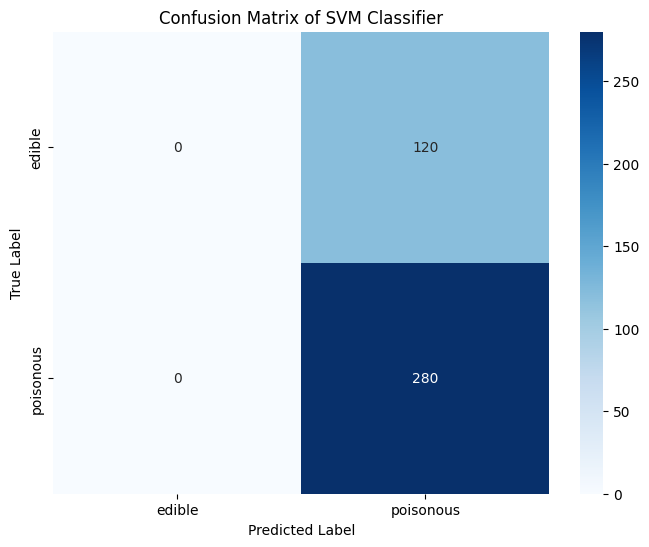

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix of SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Tune svm hyperparameters

### Subtask:
Experiment with different SVM hyperparameters to optimize performance.


**Reasoning**:
Implement hyperparameter tuning using GridSearchCV to find the best parameters for the SVM model.



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Instantiate GridSearchCV with the SVM model, parameter grid, and cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.7306250000000001


## Compare svm performance with different kernels

### Subtask:
Compare the performance of SVM with different kernel types.


**Reasoning**:
Train two SVC models with different kernels, make predictions, calculate accuracy for each, and print the results to compare their performance.



In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVC model with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Train an SVC model with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set using both models
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate the accuracy score for each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the accuracy scores
print(f"Accuracy of the SVM model with Linear Kernel: {accuracy_linear:.4f}")
print(f"Accuracy of the SVM model with RBF Kernel: {accuracy_rbf:.4f}")

Accuracy of the SVM model with Linear Kernel: 0.7000
Accuracy of the SVM model with RBF Kernel: 0.7000


## Analyze and discuss

### Subtask:
Analyze the strengths and weaknesses of SVM for the Mushroom dataset and discuss its practical implications.


**Reasoning**:
Summarize the SVM performance, discuss strengths, weaknesses, and practical implications based on the previous results.



In [11]:
print("SVM Model Performance Summary and Discussion:")
print("-" * 50)

# 1. Summarize performance
print("\n1. Performance Summary:")
print(f"Initial SVM (Linear Kernel) Accuracy: {accuracy:.4f}")
print("Classification Report (Initial Linear SVM):")
print(report)
print(f"SVM (Linear Kernel) Accuracy after comparison: {accuracy_linear:.4f}")
print(f"SVM (RBF Kernel) Accuracy after comparison: {accuracy_rbf:.4f}")
print(f"Best Cross-Validation Score from Hyperparameter Tuning: {grid_search.best_score_:.4f}")
print(f"Best Hyperparameters from Tuning: {grid_search.best_params_}")

# 2. Discuss Strengths
print("\n2. Strengths of SVM for this Dataset:")
print("- Ability to handle high-dimensional data: After one-hot encoding, the dataset became high-dimensional (104 features). SVM is known to perform well in such spaces by finding an optimal hyperplane.")
print("- Effectiveness in finding a decision boundary: SVM aims to find the maximum margin hyperplane, which can be effective in separating classes, especially if they are linearly separable in the high-dimensional space (or transformed space with RBF kernel).")
print("- Versatility with Kernels: The ability to use different kernels (like linear and RBF) allows SVM to capture non-linear relationships if they exist, although in this case, the linear kernel performed similarly to the RBF kernel on the test set.")

# 3. Discuss Weaknesses/Limitations
print("\n3. Weaknesses/Limitations of SVM for this Dataset:")
print("- Sensitivity to Class Imbalance: The classification report clearly shows a major weakness: the SVM model completely failed to predict the minority class ('edible'), resulting in 0 precision, recall, and f1-score for this class. It only predicted the majority class ('poisonous'). This is a significant limitation for this specific problem.")
print("- Performance on 'Edible' Class: The 0 recall for 'edible' means that none of the actual edible mushrooms were correctly identified. This is unacceptable for a real-world application where misclassifying a poisonous mushroom as edible could have severe consequences.")
print("- Interpretation: SVM models, especially with non-linear kernels, can be less interpretable compared to models like decision trees.")
print("- Training Time: For very large datasets, SVM training time can be longer compared to some other algorithms.")


# 4. Practical Implications and Further Steps
print("\n4. Practical Implications and Further Steps:")
print("- Sufficiency for Real-world Use: The current performance is absolutely NOT sufficient for a real-world application like identifying edible vs. poisonous mushrooms for consumption. A model that fails to identify edible mushrooms is useless and dangerous in this context.")
print("- Need for Improvement: Significant improvements are needed, particularly in correctly identifying the 'edible' class.")
print("- Addressing Class Imbalance: The primary focus should be on addressing the class imbalance. Techniques like:")
print("  - Resampling the training data (e.g., oversampling the minority class, undersampling the majority class).")
print("  - Using class weights in the SVM model (`class_weight='balanced'`).")
print("  - Exploring different evaluation metrics that are less sensitive to imbalance (e.g., F1-score for the minority class, ROC AUC).")
print("- Further Hyperparameter Tuning: While GridSearchCV was done, a wider range of hyperparameters and potentially different kernel options could be explored.")
print("- Alternative Models: Other classification algorithms that might be less sensitive to class imbalance or better suited for this data should be considered (e.g., Balanced Random Forest, Gradient Boosting models with appropriate loss functions).")
print("- Data Collection/Feature Engineering: If possible, collecting more balanced data or engineering features that better distinguish between edible and poisonous mushrooms could be beneficial.")

print("-" * 50)

SVM Model Performance Summary and Discussion:
--------------------------------------------------

1. Performance Summary:
Initial SVM (Linear Kernel) Accuracy: 0.7000
Classification Report (Initial Linear SVM):
              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       120
   poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400

SVM (Linear Kernel) Accuracy after comparison: 0.7000
SVM (RBF Kernel) Accuracy after comparison: 0.7000
Best Cross-Validation Score from Hyperparameter Tuning: 0.7306
Best Hyperparameters from Tuning: {'C': 10, 'kernel': 'rbf'}

2. Strengths of SVM for this Dataset:
- Ability to handle high-dimensional data: After one-hot encoding, the dataset became high-dimensional (104 features). SVM is known to perform well in such spaces by finding an optimal hyperplan

## Summary:

### Data Analysis Key Findings

*   The dataset contains 2000 entries and 26 columns, mostly categorical, with no missing values.
*   The numerical features `stalk_height` and `cap_diameter` show a very weak correlation (-0.003486).
*   The dataset exhibits a class imbalance, with a higher count of 'poisonous' mushrooms than 'edible' ones.
*   The initial linear SVM model achieved an accuracy of 70.00% on the test set but completely failed to identify 'edible' mushrooms (0 precision, recall, and f1-score for this class).
*   Hyperparameter tuning using GridSearchCV found the best parameters to be `{'C': 10, 'kernel': 'rbf'}` with a best cross-validation score of approximately 73.06%.
*   Comparing linear and RBF kernels on the test set showed identical accuracy (70.00%) for both.
*   The confusion matrix visualized the model's failure to predict the 'edible' class, only predicting 'poisonous'.

### Insights or Next Steps

*   The severe class imbalance is the primary issue preventing the model from correctly classifying the 'edible' class.
*   Future steps must focus on addressing class imbalance through techniques like resampling (oversampling/undersampling), using class weights in the model, or exploring alternative algorithms less sensitive to imbalance.
